# Quicksort

# Algorithm

In [6]:
import random

def quicksort(arr):
    steps = 0

    def quicksort_inner(arr, start_idx, end_idx):
        nonlocal steps
        if start_idx >= end_idx:
            return
        steps += 1
        
        pivot_idx = random.randint(start_idx, end_idx)
        arr[pivot_idx], arr[end_idx] = arr[end_idx], arr[pivot_idx]
        
        pivot_idx = end_idx
        pointer = start_idx
        steps += 4

        for i in range(start_idx, end_idx):
            if arr[i] < arr[pivot_idx]:
                if i != pointer:
                    arr[i], arr[pointer] = arr[pointer], arr[i]
                    steps += 1
                pointer += 1
                steps += 1
        
        arr[pointer], arr[pivot_idx] = arr[pivot_idx], arr[pointer]
        pivot_idx = pointer
        steps += 2
        
        quicksort_inner(arr, start_idx, pivot_idx - 1)
        quicksort_inner(arr, pivot_idx + 1, end_idx)

    quicksort_inner(arr, 0, len(arr) - 1)
    return steps

   

In [7]:
B = [5, 2, 4, 6, 1, 3]
steps = quicksort(B)
print(B, steps)

[1, 2, 3, 4, 5, 6] 34


13 / 13


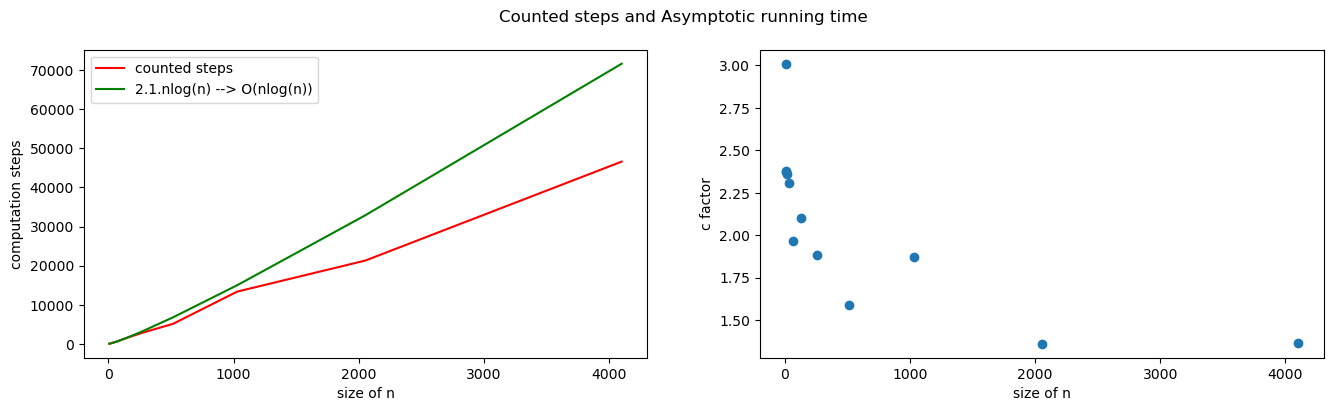

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import sys
from math import log
from IPython.display import clear_output

mpl.rcParams['figure.figsize'] = [16,4]
sys.setrecursionlimit(10000)

fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')

points = 13 # plotting points
x = []
y = []
ref = []
c = []

for i in range(1, points):
    clear_output(wait = True)
    print(i + 1, "/", points)

    # Generate a new random array of size 5 + 2**i
    B = [random.randint(1, 10) for _ in range(5 + 2**i)]

    steps = quicksort(B) 
    x.append(len(B))
    y.append(steps)    
    c.append(steps / (len(B) * log(len(B))))  # estimation of c for T(sort) = c.N.log(N)
    
for v in x:
    ref.append([v * log(v) * c[6]])

ax[0].plot(x, y, color="red", label="counted steps")
ax[0].plot(x, ref, color="green", label=str(round(c[6], 2)) + ".nlog(n) --> O(nlog(n))")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x, c, label = "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")

plt.show()    

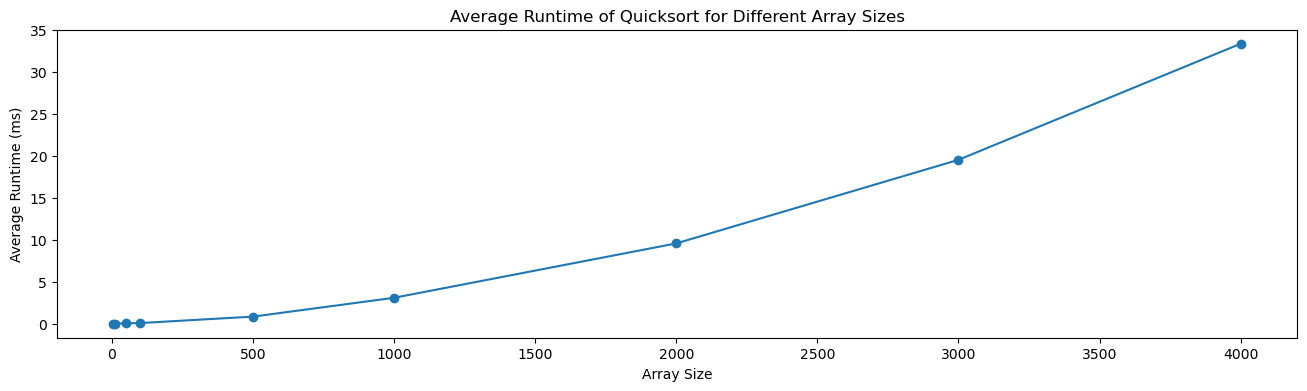

In [9]:
import time
import random

def time_function(arr):
    start = time.time()
    quicksort(arr)
    end = time.time()
    return end - start

inputSizes = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000]; 
num_runs = 1000
average_runtimes = []

for size in inputSizes:
    total_time = 0
    for _ in range(num_runs):
        arr = [random.randint(1, 10) for _ in range(size)]
        total_time += time_function(arr)
    average_runtimes.append((total_time / num_runs) * 1000)

# Plotting
plt.plot(inputSizes, average_runtimes, marker='o')
plt.xlabel('Array Size')
plt.ylabel('Average Runtime (ms)')
plt.title('Average Runtime of Quicksort for Different Array Sizes')
plt.show()